In [3]:
from knn import house_KNN
from knn import clean_noise
import geopy
# Analysis in weighted distance KNN and unweighted distance
def KNN_test(region_houses_list,attri,distance_method): 
    i = 0
    results = []
    for index,house_info in region_houses_list.iterrows():
        i+=1
        #To speed up the test, beacause a property has to compare all the neighbours in the area
        #it is impossible to calculate billions of the properties and neighbour pair,
        #so it is nessasary to sampling data in order to speed up testing
        if i>len(region_houses_list.index)/10 or i> 100:
            break
        else:
            # not include itself
            neighbours = region_houses_list.drop([index])
            #get K neighbours 
            k_neighbour_list = house_KNN(house_info,neighbours,5,attri,distance_method)
            #get average price of K neighbours and the real property asking price
            results.append([k_neighbour_list["price"].mean(),house_info["price"]])
            
    results = pd.DataFrame(results)
    results.columns = ['estimate','real']
    results['estimate_error'] = (results['estimate'] - results['real'])/results['real']
    results = results.round({'estimate_error':3})
    return results

            
        

    

In [4]:
"""
Compare the error rate between weightedKNN and unweightedKNN

Use 1/3 of area dataset as validation set

Results are surprisingly good, which are displayed below

"""

%load_ext autoreload
%autoreload
import pandas as pd
import json_reader
from region_extractor import extract_region
import os
import math
import tqdm
from knn import calculate_weightedDistance
from knn import calculate_Distance
from random import shuffle

%matplotlib inline

train_features = ["num_bath","num_bed","month_view","coordinate"]
house_type = ["end terrace","terraced","semi-detached","detached","flat"]
path = "./rent_region/"
region_list  =os.listdir(path) 
if ".DS_Store" in region_list:
    region_list.remove(".DS_Store")
i = 0
from tqdm import tqdm
regions = []
region_result = []
total_result = []
for region in tqdm(region_list[::-1]):
    i+=1
    print(region)
    region_houses_list = list(json_reader.json_read(path,region)[0].values())[0]
    shuffle(region_houses_list)
    if len(region_houses_list)<=1:
        continue        
    
    #region_df = pd.DataFrame(region_houses_list )
    region_df = clean_noise(region_houses_list,150,house_type)
    #drop features to save memory space
    region_df = region_df.drop(['crawling_time','first_published_date','postcode','top3near_by'],axis = 1)
    
    #results for weighted distance
    results = KNN_test(region_df,train_features,calculate_weightedDistance)
    
    #results for not weighted
    results2 = KNN_test(region_df,train_features,calculate_Distance)
    
    
    
    #putting weightedKNN and unweightedKNN's estimate_error together
    region_result.append([results['estimate_error'].mean(),results2['estimate_error'].mean()])
    
    results2 = results2.drop(['real','estimate_error'],axis = 1)
    
    results = results.drop(['estimate_error'],axis = 1)
    result = pd.concat([results,results2],axis = 1)
    total_result.append(result)
    
    # use 1/3 of the data as validation set
    if i>30:
        break


total_result = pd.concat(total_result)
print(total_result.shape)
    


  0%|          | 0/121 [00:00<?, ?it/s]

ZE.json
YO.json


  2%|▏         | 2/121 [00:52<52:12, 26.32s/it]

WV.json


  2%|▏         | 3/121 [03:07<2:03:06, 62.60s/it]

WS.json


  3%|▎         | 4/121 [04:30<2:11:44, 67.56s/it]

WR.json


  4%|▍         | 5/121 [04:57<1:55:12, 59.59s/it]

WN.json


  5%|▍         | 6/121 [05:10<1:39:04, 51.70s/it]

WF.json


  6%|▌         | 7/121 [06:24<1:44:14, 54.87s/it]

WD.json


  7%|▋         | 8/121 [10:00<2:21:18, 75.03s/it]

WC.json


  7%|▋         | 9/121 [10:32<2:11:05, 70.22s/it]

WA.json


  8%|▊         | 10/121 [12:12<2:15:34, 73.28s/it]

W.json


  9%|▉         | 11/121 [40:02<6:40:20, 218.37s/it]

UB.json


 10%|▉         | 12/121 [47:04<7:07:38, 235.40s/it]

TW.json


 11%|█         | 13/121 [1:00:48<8:25:12, 280.67s/it]

TS.json


 12%|█▏        | 14/121 [1:03:49<8:07:44, 273.50s/it]

TR.json


 12%|█▏        | 15/121 [1:04:11<7:33:40, 256.79s/it]

TQ.json


 13%|█▎        | 16/121 [1:04:32<7:03:33, 242.03s/it]

TN.json


 14%|█▍        | 17/121 [1:08:54<7:01:31, 243.19s/it]

TF.json


 16%|█▌        | 19/121 [1:09:23<6:12:30, 219.13s/it]

TD.json
TA.json


 17%|█▋        | 20/121 [1:09:37<5:51:36, 208.88s/it]

SY.json


 17%|█▋        | 21/121 [1:09:42<5:31:54, 199.15s/it]

SW.json


 18%|█▊        | 22/121 [1:33:19<6:59:59, 254.54s/it]

ST.json


 19%|█▉        | 23/121 [1:34:50<6:44:07, 247.42s/it]

SS.json


 20%|█▉        | 24/121 [1:37:19<6:33:20, 243.30s/it]

SR.json


 21%|██        | 25/121 [1:37:53<6:15:53, 234.93s/it]

SP.json


 21%|██▏       | 26/121 [1:38:14<5:58:56, 226.70s/it]

SO.json


 22%|██▏       | 27/121 [1:49:02<6:19:35, 242.30s/it]

SN.json


 23%|██▎       | 28/121 [1:52:51<6:14:50, 241.83s/it]

SM.json


 24%|██▍       | 29/121 [1:55:00<6:04:52, 237.96s/it]

SL.json


 25%|██▍       | 30/121 [2:01:32<6:08:41, 243.09s/it]

SK.json
(2123, 3)


In [5]:
total_result.columns = ['WKNN','real','UNKNN']
total_result['WKNNT'] = total_result['WKNN'] - total_result['real']
total_result['UNKNNT'] = total_result['UNKNN'] - total_result['real']
total_

In [6]:
total_result.shape

(2123, 5)

In [13]:
total_result.to_csv("rent_test.csv",index = False)


In [4]:
import pandas as pd
total_result = pd.read_csv("rent_test.csv")
total_result = total_result.abs()

In [5]:
from scipy.stats import ttest_ind

ttest = ttest_ind(total_result['WKNNT'],total_result['UNKNNT'])
print(ttest)

Ttest_indResult(statistic=-6.1054004547170484, pvalue=1.117185768183035e-09)


           0         1
0   0.003340  0.085710
1   0.077700  0.063800
2   0.075750  0.150750
3   0.037900  0.109290
4   0.087060  0.181340
5   0.098260  0.227220
6   0.035770  0.035920
7   0.034219  0.039156
8   0.092394  0.110070
9   0.019145  0.036982
10  0.064490  0.150760
11  0.020771  0.022000
12  0.007269  0.058423
13  0.037808  0.034577
14  0.019700  0.059700
15  0.037530  0.138200
16  0.158511  0.149432
17  0.016545  0.129354
18  0.000500  0.052333
19  0.027630  0.074470
20  0.038639  0.194278
21  0.018579  0.023763
22  0.040537  0.115837
23  0.006590  0.093590
24  0.097227  0.195943
25  0.074774  0.165129
26  0.002187  0.003025
27  0.264267  0.401333
28  0.010490  0.020230


weightedKNN average error rate: 0.052 
unweightedKNN average error rate: 0.108 
Which means weightedKNN has a better performance on prediction


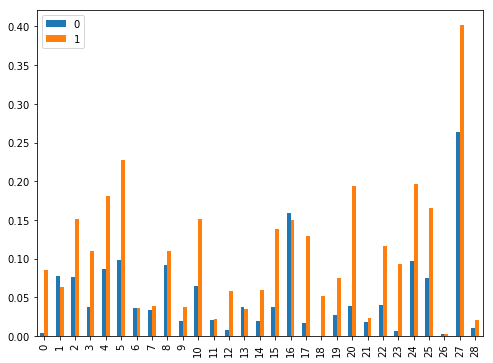

In [159]:
import matplotlib.pyplot as plt
#%store region_result
error_df = pd.DataFrame(region_result)
error_df = error_df.applymap(abs)
error_df.plot.bar()

print(error_df)
print("\n")
print("weightedKNN average error rate: %.3f "%error_df[0].mean())
print("unweightedKNN average error rate: %.3f "%error_df[1].mean())
print("Which means weightedKNN has a better performance on prediction")

In [87]:
"""
Unuseful codes
#t.to_csv("property_type_mean.csv")

    #region_examples, region_target = prepareTrainingdata(region_houses_list,"rent","rent")
    #examples.append(region_examples)
    #target.append(region_target)
"""
    
"""
Analyze the relevance between feature property_type and label price 
"""
    
%load_ext autoreload
%autoreload
import pandas as pd
import json_reader
from region_extractor import extract_region
import os
import math
import random

%matplotlib inline

train_features = ["num_bath","num_bed","month_view","coordinate"]
house_type = ["end terrace","terraced","semi-detached","detached","flat"]
path = "./rent_region/"
region_list  =os.listdir(path) 
if ".DS_Store" in region_list:
    region_list.remove(".DS_Store")
i = 0
bed = 1
from tqdm import tqdm

regions_2_df = pd.DataFrame()
region_ptype_mean  = []
random.shuffle(region_list)

for region in region_list:
    i+=1
    region_houses_list = list(json_reader.json_read(path,region)[0].values())[0]
    if len(region_houses_list)<=1:
        continue 
    regions_2_df = clean_noise(region_houses_list,150,house_type)
    regions_2_df = regions_2_df.drop(['crawling_time','first_published_date','postcode','top3near_by'],axis = 1)
    
    grouped = regions_2_df[regions_2_df['num_bed']==bed].groupby(['property_type'])['price']
    mean = grouped.mean().astype(int)
    mean.name = region
    region_ptype_mean.append(mean)
    if i>30:
        break
    
property_mean_in_regions = pd.concat(region_ptype_mean,axis = 1).T 
#property_mean_in_regions['std'] =

#print(property_mean_in_regions)

print("\n            Average price in different house type:")
print(property_mean_in_regions)
print("\n")
print("Standard deviation between differnt house type in monthly rent :\n",property_mean_in_regions.std(axis = 1))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

            Average price in different house type:
         detached  end terrace    flat  semi-detached  terraced
SL.json     919.0        904.0   933.0          973.0     937.0
BS.json     536.0        658.0   785.0          639.0     557.0
BR.json    1231.0       1025.0   991.0          870.0     901.0
GL.json     522.0        577.0   590.0          530.0     578.0
ST.json     511.0        425.0   439.0          514.0     362.0
WV.json     531.0          NaN   427.0          415.0     391.0
GU.json     853.0        902.0   916.0          972.0    1004.0
MK.json    1158.0        687.0   738.0          659.0     676.0
AB.json     500.0        485.0   501.0            NaN     490.0
TW.json     987.0        980.0  1190.0          868.0     993.0
WD.json     841.0        954.0   937.0         1106.0     991.0
DA.json     850.0        825.0   820.0          656.0     711.0
SE.json     992.0       1002

There is no obvious relation between different property_type and price with the same bedrooms


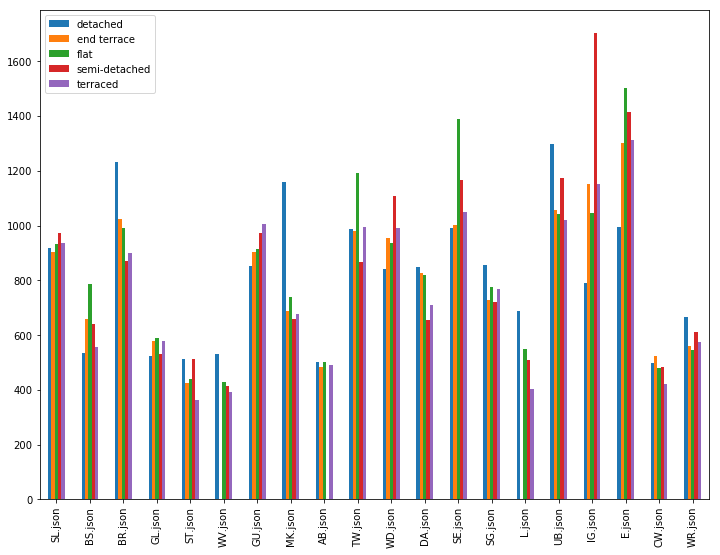

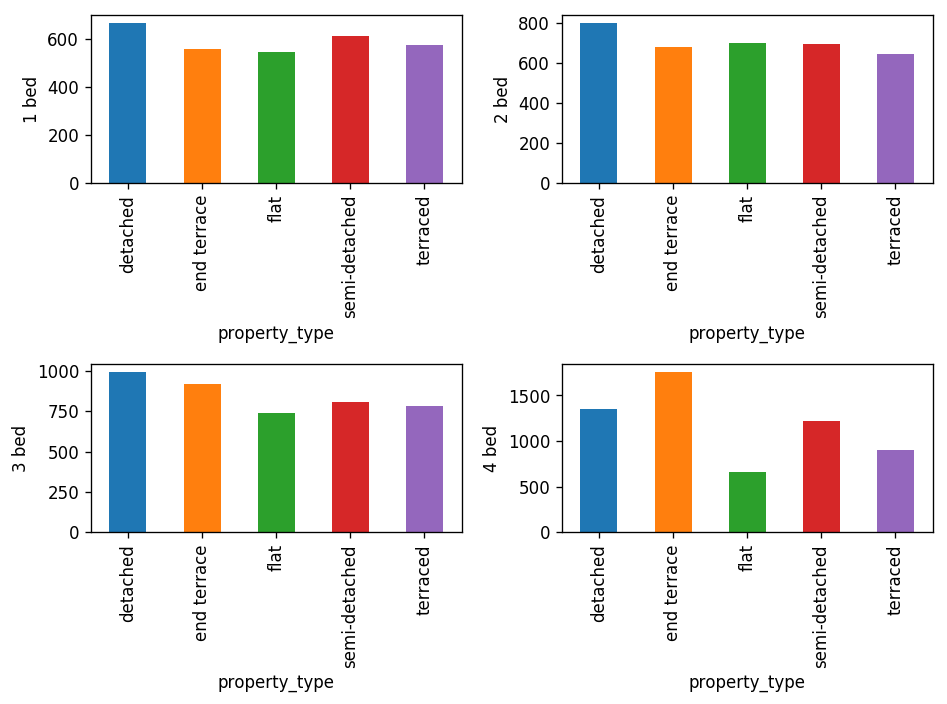

In [114]:

plt.rcParams["figure.figsize"] = [12,9]
property_mean_in_regions.plot.bar()

plt.figure(figsize=(8,6), dpi=120)
grouped = regions_2_df[regions_2_df['num_bed']==1].groupby(['property_type'])['price']
mean = grouped.mean().astype(int)
plt.subplot(221)
mean.plot.bar(stacked=True).set_ylabel('1 bed')
grouped = regions_2_df[regions_2_df['num_bed']==2].groupby(['property_type'])['price']
mean = grouped.mean().astype(int)
plt.subplot(222)
mean.plot.bar(stacked=True).set_ylabel('2 bed')
grouped = regions_2_df[regions_2_df['num_bed']==3].groupby(['property_type'])['price']
mean = grouped.mean().astype(int)
plt.subplot(223)
mean.plot.bar(stacked=True).set_ylabel('3 bed')
grouped = regions_2_df[regions_2_df['num_bed']==4].groupby(['property_type'])['price']
mean = grouped.mean().astype(int)
plt.subplot(224)
mean.plot.bar(stacked=True).set_ylabel('4 bed')
plt.tight_layout()

print("There is no obvious relation between different property_type and price with the same bedrooms")


In [149]:
import random
random.shuffle(region_list)
num_bed = 4
std_div_mean_list = []
i =0 
for region in region_list:
    i+=1
    region_houses_list = list(json_reader.json_read(path,region)[0].values())[0]
    if len(region_houses_list)<=1:
        continue 
    regions_2_df = clean_noise(region_houses_list,150,house_type)
    regions_2_df = regions_2_df.drop(['crawling_time','first_published_date','postcode','top3near_by'],axis = 1)
    std_div_mean = []
    for j in range(1,num_bed+1):
        grouped = regions_2_df[regions_2_df['num_bed']==j].groupby(['property_type'])['price']
        std_div_mean.append(grouped.median().std()/grouped.median().mean())
    std_div_mean = pd.DataFrame(std_div_mean)
    std_div_mean.columns = [region] 
    std_div_mean_list.append(std_div_mean)
    if i >20:
        break
        
std_div_mean_df = pd.concat(std_div_mean_list,axis = 1).T


In [150]:

%store std_div_mean_df 

Stored 'std_div_mean_df' (DataFrame)


Price difference percentage between differnt house type in regions 
             1bed      2bed      3bed      4bed
BL.json  0.226838  0.152367  0.132093  0.213289
TN.json  0.078599  0.128075  0.109213  0.183944
S.json   0.099408  0.157912  0.148098  0.192896
CM.json  0.029422  0.042056  0.073934  0.118654
KT.json  0.039579  0.031219  0.075489  0.124474
PE.json  0.063934  0.029920  0.096951  0.169091
TF.json  0.074147  0.092547  0.229231  0.288220
DY.json  0.338089  0.020145  0.153392  0.100237
OL.json  0.624367  0.204538  0.152903  0.115180
MK.json  0.174605  0.023459  0.083857  0.131891
DN.json  0.121218  0.102323  0.132869  0.207400
HR.json  0.113029  0.070108  0.109208  0.194066
OX.json  0.117007  0.081197  0.159297  0.118319
NW.json  0.373092  0.148101  0.277407  0.294518
SG.json  0.065061  0.090282  0.039499  0.240446
LD.json       NaN  0.116448  0.140839  0.310437
FK.json       NaN  0.524725  0.075938  0.045398
EX.json  0.167549  0.053516  0.070969  0.161232
TQ.json  0.179687  0

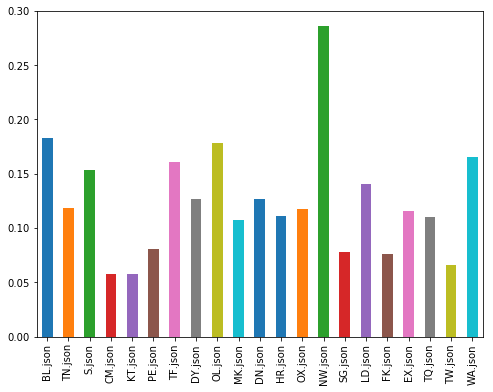

In [153]:
print("Price difference percentage between differnt house type in regions ")
std_div_mean_df.columns = ["1bed","2bed","3bed","4bed"]
print(std_div_mean_df )
plt.rcParams["figure.figsize"] = [8,6]
std_div_mean_df.median(axis = 1).plot.bar()
                               
#plt.figure()
#plt.bar(range(len()),std_list)
#plt.show()